# Project: Linear Regression using Stochastic Gradient Descent
---

## **1. Project Overview**

This data science project focuses on predicting gym crowdedness using stochastic gradient descent linear regression. The project utilizes a real-world dataset to determine the best times to visit the campus gym to avoid crowds and enjoy efficient workouts.

### **1.1 Project Objectives**

The primary objective of this project is to leverage machine learning techniques to forecast the number of people at the campus gym on specific days and times. This predictive model will help gym-goers plan workouts effectively and minimize waiting times.


### 1.2 **Defining functions for later use**
A secton simply used for defining useful functions

The project will be organized into the following sections:

**2. Exploratory Data Analysis and Data Cleaning**

- Exploratory Data Analysis (EDA) is performed to gain insights into the dataset. Data cleaning and preprocessing are carried out to prepare the data for model training.

**3. Model Construction**

- This section outlines the steps required to split the data into training and testing sets. The Scikit-Learn library's SDGRegressor is used to construct and train a stochastic gradient descent linear regression model.

**4. Model Performance Evaluation**

- Model performance is assessed, and evaluation metrics are used to determine how accurately the model predicts gym crowdedness. The section provides insights into the model's effectiveness.

**5. Results Visualization**

- The results of the predictive model are visualised using Matplotlib. Visualisations help in understanding gym crowdedness trends and identifying optimal workout times.

**6. Summarising Results**

- This final section summarises key findings and conclusions drawn from the project. It also provides guidance on how to interpret the model's predictions for gym-goers.

In [36]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import boxcox, shapiro, normaltest

# import sklearn stochastic linear regression libraries gradient descent
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score



# Setting up the notebook
import warnings 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
pd.options.display.float_format = '{:.2f}'.format
# warnings.filterwarnings('ignore')

# Setting up the plotting style
sns.set_theme(style='darkgrid')
sns.set_context('paper')

### 1.2 Defining functions for later use

TODO: 

- organise these function into .py modules
- add warning for `**kwargs` that tells user if the variable is not used in the function

#### 1.2.1 Notebook Display Functions

In [37]:
# Code for displaying Markdown content used typically in conjunction display() 
# for displaying multiple dataframes in a single cell

from IPython.display import Markdown, display

def display_markdown(content, bold=True) -> None:
    """
    Display Markdown content using IPython.display.
    
    Parameters:
    content (str): The Markdown content to be displayed.
    bold (bool): Set to false to remove bold text by default
    """
    
    # Making content bold by default
    if bold:
        content = f'**{content}**'
    
    # Use IPython's display function to render Markdown content
    display(Markdown(content))

In [38]:
# This function takes in a list of pandas objects (either DataFrames or Series)
# and displays them side by side. It can be used to compare data from multiple
# DataFrames or Series. For example, you can display the results of various
# feature engineering steps side by side to compare them.

import pandas as pd
from IPython.display import display, HTML

def disp_table_side_by_side(*args):
    """Display pandas objects side-by-side.

    Parameters:
        *args: The pandas objects to display.

    Example:
        >>> display_side_by_side(df1, df2, df3)
    """
    # Convert DataFrames/Series to HTML tables
    tables = []
    for obj in args:
        if isinstance(obj, pd.DataFrame):
            tables.append(obj.to_html())
        elif isinstance(obj, pd.Series):
            # Convert Series to DataFrame and then to HTML
            df = pd.DataFrame(obj)
            tables.append(df.to_html())
        else:
            raise ValueError("Input must be a DataFrame or Series")

    # Create custom HTML to display tables side by side
    custom_html = ''.join([f'<div style="display: inline-block; margin-right: 20px;">{table}</div>' for table in tables])

    # Display custom HTML
    display(HTML(custom_html))

In [39]:
import pandas as pd 
from IPython.display import display, HTML


def scroll_table(data: pd.DataFrame, 
              table_hight=300, 
              table_width='fit-content'
              ) -> None:
    """
    Display a DataFrame as a scrollable table.

    Parameters:
        df (pandas.DataFrame): The DataFrame to display.
    """
    # Set the maximum number of rows to display
    pd.set_option("display.max_rows", None)

    # Wrap the DataFrame in an HTML div element with a scrollbar
    display(HTML(f"<div style='height: {table_hight}px; overflow: auto; width: {table_width}'>" +
                 data.to_html() +
                 "</div>"))

#### 1.2.2 Visualisation Functions

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd

# Uncomment the line below to set the default theme for Seaborn plots
# sns.set_theme(style='darkgrid')

def plot_df_distributions(df_input: pd.DataFrame, **kwargs) -> None:
    """
    Plots distribution plots for numeric columns in a DataFrame.

    Parameters:
    df (DataFrame): The input data frame.
    *args: Additional arguments for customizing the plots.
    **kwargs: Additional keyword arguments for customizing the plots.
        figsize (tuple): Figure size (default: (20, 4 * num_rows)).
        bins (int): Number of bins in the histogram (default: 20).
        kde (bool): Whether to include KDE (default: True).
        title_fontsize (int): Fontsize for subplot titles (default: 16).
        title_fontweight (str): Font weight for subplot titles (default: 'bold').
        title_color (str): Color for subplot titles (default: 'grey').
        num_columns (int): Number of columns in the subplot grid (default: 3).
        color_palette (str or list): A color palette name or a list of colors to use in the plots (default: None).
        x_label (str): Label for the x-axis (default: None).
        y_label (str): Label for the y-axis (default: None).
        subplot_spacing (float): Adjust the spacing between subplots (e.g., 0.2 for 20% spacing, default: 0.5).
        title_prefix (str): A prefix to be added to all subplot titles (default: '').
        save_to_file (str): File path to save the plots. If provided, the plots are saved to this file (default: None).
        transparency (float): The level of transparency for plot elements (0.0 to 1.0, default: 1.0).
        font_family (str): Font family for plot labels and titles (default: None).
        legend_position (str): Position of the legend (e.g., "upper right", "lower left", default: None).
        grid_style (str): Style of the grid lines (e.g., "dotted", "dashed", default: '-').
        kde_bandwidth (float): Bandwidth parameter for KDE estimation (default: None).

    Returns:
    None
    """
    
    df = df_input.copy()

    # Get a list of numeric columns in the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()

    # Calculate the number of subplot rows and columns
    num_rows = len(numeric_columns) // kwargs.get("num_columns", 3)
    if len(numeric_columns) % kwargs.get("num_columns", 3) != 0:
        num_rows += 1

    # Create a figure with subplots
    figsize = kwargs.get("figsize", (20, 4 * num_rows))
    plt.figure(figsize=figsize)

    # Set the color palette if provided, otherwise use the default Seaborn palette
    color_palette = kwargs.get("color_palette", None)
    if color_palette:
        if isinstance(color_palette, str) and color_palette in sns.palettes.SEABORN_PALETTES:
            sns.set_palette(color_palette)
        elif isinstance(color_palette, list) and all(isinstance(color, str) for color in color_palette):
            sns.set_palette(color_palette)
        else:
            warnings.warn("Invalid color_palette value. Using the default Seaborn palette.", UserWarning)
            sns.set_palette(sns.color_palette())
    
    # Loop through each numeric column and create a subplot
    for i, column in enumerate(numeric_columns, 1):
        plt.subplot(num_rows, kwargs.get("num_columns", 3), i)  # Create a subplot in the grid

        # Use try-except to temporarily suppress the warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)

            # Create a histogram with a kernel density estimate
            sns.histplot(df[column], bins=kwargs.get("bins", 20), kde=kwargs.get("kde", True))
        
        # Customize axis labels
        plt.xlabel(kwargs.get("x_label", None))
        plt.ylabel(kwargs.get("y_label", None))

        # Add a title to the subplot with a custom prefix
        title_prefix = kwargs.get("title_prefix", "")
        plt.title(f'{title_prefix}Distribution of {column}',
                  fontsize=kwargs.get("title_fontsize", 16),
                  fontweight=kwargs.get("title_fontweight", 'bold'),
                  color=kwargs.get("title_color", 'grey'),
                  wrap=True)

    # Adjust layout and subplot spacing
    plt.tight_layout(rect=[0, 0, 1, 0.95], h_pad=kwargs.get("subplot_spacing", 0.5))

    # Customize legend, font family, and grid style
    legend_position = kwargs.get("legend_position", None)
    if legend_position:
        plt.legend(loc=legend_position)
    plt.grid(True, linestyle=kwargs.get("grid_style", '-'), alpha=kwargs.get("transparency", 1.0))

    # Customize font family
    font_family = kwargs.get("font_family", None)
    if font_family:
        plt.rcParams['font.family'] = font_family

    # Save plots to a file if specified, otherwise display them
    save_to_file = kwargs.get("save_to_file", None)
    if save_to_file:
        plt.savefig(save_to_file)
    else:
        plt.show()


In [41]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# Uncommnet the line below to set the default theme for Seaborn plots
# sns.set_theme(style='darkgrid')

# An overly complicated, but Beautiful heat map created using scatterplots
# TODO: improve the customisation with kwargs


def heatmap(x, y, **kwargs):
    
    
    """
    Create a heatmap visualization using scatter plots.

    Parameters:
        x (list): List of x-axis data values.
        y (list): List of y-axis data values.
        **kwargs: Additional keyword arguments for customization.
            - color: List of colors for data points.
            - palette: Color palette for mapping data values to colors.
            - color_range: Range of values to be mapped to the palette.
            - size: List of sizes for data points.
            - size_range: Range of sizes for data points.
            - size_scale: Scaling factor for sizes.
            - marker: Marker style for scatter plot.
            - x_order: Order of x-axis categories.
            - y_order: Order of y-axis categories.
            - title: Title for the main scatter plot.
    
    Returns:
        None
    """


    if 'color' in kwargs:
        color = kwargs['color']
    else:
        color = [1]*len(x)
        
    if 'palette' in kwargs:
        palette = kwargs['palette']
        n_colors = len(palette)
    else:
        n_colors = 256 # Use 256 colors for the diverging color palette
        palette = sns.color_palette("Blues", n_colors) 
        
    if 'color_range' in kwargs:
        color_min, color_max = kwargs['color_range']
    else:
        color_min, color_max = min(color), max(color) # Range of values that will be mapped to the palette, i.e. min and max possible correlation

    def value_to_color(val):
        if color_min == color_max:
            return palette[-1]
        else:
            val_position = float((val - color_min)) / (color_max - color_min) # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            ind = int(val_position * (n_colors - 1)) # target index in the color palette
            return palette[ind]
    
    if 'size' in kwargs:
        size = kwargs['size']
    else:
        size = [1]*len(x)
    
    if 'size_range' in kwargs:
        size_min, size_max = kwargs['size_range'][0], kwargs['size_range'][1]
    else:
        size_min, size_max = min(size), max(size)
        
    size_scale = kwargs.get('size_scale', 500)
    
    def value_to_size(val):
        if size_min == size_max:
            return 1 * size_scale
        else:
            val_position = (val - size_min) * 0.99 / (size_max - size_min) + 0.01 # position of value in the input range, relative to the length of the input range
            val_position = min(max(val_position, 0), 1) # bound the position betwen 0 and 1
            return val_position * size_scale
    if 'x_order' in kwargs: 
        x_names = [t for t in kwargs['x_order']]
    else:
        x_names = [t for t in sorted(set([v for v in x]))]
    x_to_num = {p[1]:p[0] for p in enumerate(x_names)}
    
    if 'y_order' in kwargs: 
        y_names = [t for t in kwargs['y_order']]
    else:
        y_names = [t for t in sorted(set([v for v in y]))]
    y_to_num = {p[1]:p[0] for p in enumerate(y_names)}
    
    plot_grid = plt.GridSpec(1, 15, hspace=0.2, wspace=0.1) # Setup a 1x10 grid
    ax = plt.subplot(plot_grid[:,:-1]) # Use the left 14/15ths of the grid for the main plot
        
    marker = kwargs.get('marker', 's')
    
    if 'title' in kwargs:
        title = kwargs['title']
    else:
        title = 'No Figure Title Set '
    
    kwargs_pass_on = {k:v for k,v in kwargs.items() if k not in [
         'color', 'palette', 'color_range', 'size', 'size_range', 'size_scale', 'marker', 'x_order', 'y_order', 'title'
    ]}
    
    ax.scatter(
        x=[x_to_num[v] for v in x],
        y=[y_to_num[v] for v in y],
        marker=marker,
        s=[value_to_size(v) for v in size], 
        c=[value_to_color(v) for v in color],
        **kwargs_pass_on
    )
    ax.set_xticks([v for k,v in x_to_num.items()])
    ax.set_xticklabels([k for k in x_to_num], rotation=45, horizontalalignment='right', color='grey')
    ax.set_yticks([v for k,v in y_to_num.items()])
    ax.set_yticklabels([k for k in y_to_num], color='grey')
    
    ax.grid(False, 'major')
    ax.grid(True, 'minor')
    ax.set_xticks([t + 0.5 for t in ax.get_xticks()], minor=True)
    ax.set_yticks([t + 0.5 for t in ax.get_yticks()], minor=True)

    ax.set_xlim([-0.5, max([v for v in x_to_num.values()]) + 0.5])
    ax.set_ylim([-0.5, max([v for v in y_to_num.values()]) + 0.5])
    ax.set_facecolor('#F1F1F1')
    
    
    # Set the title for the main scatter plot
    #ax_scatter = plt.gca()  # Get the current axis for the main scatter plot
    ax.set_title(kwargs.get('title', 'No Figure Title Set'), fontsize=20, 
                 fontweight='bold', color='grey', loc='left',
                 linespacing=1, wrap=True,
                 )

    
    # Add color legend on the right side of the plot
    if color_min < color_max:
        ax = plt.subplot(plot_grid[:,-1]) # Use the rightmost column of the plot

        col_x = [0]*len(palette) # Fixed x coordinate for the bars
        y=np.linspace(color_min, color_max, n_colors) # y coordinates for each of the n_colors bars

        bar_height = y[1] - y[0]
        ax.barh(
            y=y,
            width=[5]*len(palette), # Make bars 5 units wide
            left=col_x, # Make bars start at 0
            height=bar_height,
            color=palette,
            linewidth=0
        )
        ax.set_xlim(1, 2) # Bars are going from 0 to 5, so lets crop the plot somewhere in the middle
        ax.grid(False) # Hide grid
        ax.set_facecolor('white') # Make background white
        ax.set_xticks([]) # Remove horizontal ticks
        ax.set_yticks(np.linspace(min(y), max(y), 3)) # Show vertical ticks for min, middle and max
        ax.yaxis.tick_right() # Show vertical ticks on the right 
        ax.yaxis.set_ticks_position('none')
        

def corrplot(df: pd.DataFrame, size_scale=500, marker='s', title='No Figure Title Set'):
    """
    Create a correlation heatmap plot.

    Parameters:
        data (pd.DataFrame): Input DataFrame containing correlation data.
        size_scale (int): Scaling factor for scatter plot point sizes.
        marker (str): Marker style for scatter plot.
        title (str): Title for the plot.

    Returns:
        None
    """
    
    data = df.copy()
    
    sns.set(color_codes=True)
    corr = pd.melt(data.reset_index(), id_vars='index')
    corr.columns = ['x', 'y', 'value']
    heatmap(
        corr['x'], corr['y'],
        color=corr['value'], color_range=[-1, 1],
        palette=sns.diverging_palette(20, 220, n=256),
        size=corr['value'].abs(), size_range=[0,1],
        marker=marker,
        x_order=data.columns,
        y_order=data.columns[::-1],
        size_scale=size_scale,
        title=title  # Pass the title parameter to heatmap
    )
    sns.set(color_codes=False)

In [42]:
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
import pandas as pd

# Uncomment the line below to set the default theme for Seaborn plots
# sns.set_theme(style='darkgrid')

def plot_box_plots(df_input: pd.DataFrame, 
                   y_col: str, 
                   **kwargs
                   ) -> None:
    """
    Plots box plots for comparing a specific column against other columns in a DataFrame.

    Parameters:
    df (pd.DataFrame): The input data frame.
    y_col (str): The column name to be used on the y-axis (for box plot comparisons).
    **kwargs: Additional keyword arguments for customizing the plots.
        figsize (tuple): Figure size (default: (20, 6)).
        num_columns (int): Number of columns in the subplot grid (default: 3).
        unique_value_threshold (int): Threshold for unique values to exclude columns (default: 20).
        bin_count (int): Number of bins for automatic binning of columns (default: None).
        exclude_cols (list): List of column names to exclude from the plots (default: None).
        include_cols (list): List of column names to include in the plots (default: None).
        notch (bool): Whether to draw notches around the median (default: False).
        sym (str or None): Symbol for identifying outliers (default: None).
        title_fontsize (int): Fontsize for subplot titles (default: 16).
        title_fontweight (str): Font weight for subplot titles (default: 'bold').
        title_color (str): Color for subplot titles (default: 'grey').
        color_palette (str or list): A color palette name or a list of colors to use in the plots (default: None).
        x_label (str): Label for the x-axis (default: None).
        y_label (str): Label for the y-axis (default: None).
        save_to_file (str): File path to save the plots. If provided, the plots are saved to this file (default: None).

    Returns:
    None
    """

    # Create a copy of the DataFrame to avoid modifying the original
    df = df_input.copy()
    #print(df_input.columns)

    # Extract kwargs or set default values
    figsize = kwargs.get("figsize", (20, 6))
    num_columns = kwargs.get("num_columns", 3)
    unique_value_threshold = kwargs.get("unique_value_threshold", 20)
    bin_count = kwargs.get("bin_count", unique_value_threshold)
    exclude_cols = kwargs.get("exclude_cols", None)
    include_cols = kwargs.get("include_cols", None)
    
    # change unique_value_threshold to bin_count if user sets 
    # bin_count to be larger than unique_value_threshold
    if bin_count > unique_value_threshold:
        unique_value_threshold = bin_count

    # Filter columns based on include_cols and exclude_cols if provided
    if include_cols:
        df = df[[y_col] + include_cols]
    elif exclude_cols:
        exclude_cols.remove(y_col)
        df = df.drop(columns=exclude_cols)

    # Create a figure with subplots
    plt.figure(figsize=figsize)

    # Set the color palette if provided, otherwise use the default Seaborn palette
    color_palette = kwargs.get("color_palette", None)
    if color_palette:
        if isinstance(color_palette, str) and color_palette in sns.palettes.SEABORN_PALETTES:
            sns.set_palette(color_palette)
        elif isinstance(color_palette, list) and all(isinstance(color, str) for color in color_palette):
            sns.set_palette(color_palette)
        else:
            warnings.warn("Invalid color_palette value. Using the default Seaborn palette.", UserWarning)
            sns.set_palette(sns.color_palette())

    # Iterate over columns (except y_col) and create box plots
    cols_to_plot = []
    for col in df.columns:
        if col != y_col:
            if df[col].nunique() <= unique_value_threshold:
                cols_to_plot.append(col)
            else:
                # Ensure that the column has a numeric data type
                if pd.api.types.is_numeric_dtype(df[col]):
                    bin_edges = pd.qcut(df[col], q=bin_count, duplicates="drop", retbins=True)[1]
                    bin_labels = [f"{int(bin_edges[i])}-{int(bin_edges[i+1])}" for i in range(len(bin_edges)-1)]
                    df[f"{col}_binned"] = pd.cut(df[col], bins=bin_edges, labels=bin_labels, include_lowest=True)
                    cols_to_plot.append(f"{col}_binned")

    num_rows = len(cols_to_plot) // num_columns
    if len(cols_to_plot) % num_columns != 0:
        num_rows += 1
        
        
    #print(df.columns)

    for i, x_col in enumerate(cols_to_plot, 1):
        plt.subplot(num_rows, num_columns, i)

        # Use try-except to temporarily suppress the warnings
        with warnings.catch_warnings():
            warnings.filterwarnings("ignore", category=FutureWarning)

            # Create a box plot using Seaborn
            sns.boxplot(data=df, x=x_col, y=y_col, notch=kwargs.get("notch", False), sym=kwargs.get("sym", None))

        # Customize axis labels
        plt.xlabel(kwargs.get("x_label", None))
        plt.ylabel(kwargs.get("y_label", None))

        # Add a title to the subplot
        plt.title(f'Box Plot of {y_col} by {x_col}',
                  fontsize=kwargs.get("title_fontsize", 16),
                  fontweight=kwargs.get("title_fontweight", 'bold'),
                  color=kwargs.get("title_color", 'grey'),
                  wrap=True)

    # Save the plot to a file if specified, otherwise display it
    save_to_file = kwargs.get("save_to_file", None)
    if save_to_file:
        plt.savefig(save_to_file)
    else:
        plt.show()


#### 1.2.3 Data Filtering Functions

In [43]:
import pandas as pd

def abs_corr_to_target(df_input: pd.DataFrame, 
                           target_col: str, 
                           nonlinear_corr=False, 
                           nonlinear_corr_method='spearman',
                           exclude_target=True,
                           ) ->pd.DataFrame:
    """
    Returns a dataframe with absolute values of correlation to target variable/column
    
    Parameters:
        df (pd.DataFrame): Input DataFrame containing correlation data.
        target_col (str): The target column to be used for correlation
        nonlinear_corr (bool): Set to True to use nonlinaer correlation, Spearman's rank by default
        nonlinear_corr_method (str): The method to be used for nonlinear correlation.
    
    Returns:
        df_corr (pd.DataFrame): A dataframe with absolute values of correlation to target variable/column
    """
    
    df = df_input.copy()
    
    # Get a list of numeric columns in the DataFrame
    numeric_columns = df.select_dtypes(include=[np.number]).columns.tolist()
    df = df[numeric_columns]
    
    
    # Get correlation to target variable
    if nonlinear_corr:
        df_corr = df.corr(method=nonlinear_corr_method)[target_col].abs().to_frame()
        df_corr.reset_index(inplace=True)
        
        # Rename the columns
        corr_col_name = f'Nonlin ({nonlinear_corr_method}) corr to: `{target_col}`'
        df_corr.columns = ['Features', corr_col_name]
        
        # Sort the values in descending order
        df_corr = df_corr.sort_values(by=corr_col_name, ascending=False)
        
    else:
        df_corr = df.corr()[target_col].abs().to_frame()
        df_corr.reset_index(inplace=True)
        
        # Rename the columns
        corr_col_name = f'lin corr to: `{target_col}`'
        df_corr.columns = ['Features', corr_col_name]
        
        # Sort the values in descending order
        df_corr = df_corr.sort_values(by=corr_col_name, ascending=False)
        

    
    if exclude_target:
        # drop target value row from the dataframe
        df_corr = df_corr[df_corr['Features'] != target_col]
    
    return df_corr


In [44]:
import pandas as pd

def find_duplicate_columns(df_input: pd.DataFrame) -> pd.DataFrame:
    """
    Find duplicate columns in a DataFrame and return them as groups.
    
    Args:
        df (pandas.DataFrame): Input DataFrame to search for duplicate columns.
        
    Returns:
        pandas.DataFrame: DataFrame containing groups of duplicate columns.
                          Columns in this DataFrame are the actual duplicate columns.
    """
    
    df = df_input.copy()
    
    duplicate_groups = []  # List to store groups of duplicate columns
    seen = set()  # Set to keep track of columns that have been processed
    
    num_columns = df.shape[1]
    
    for i in range(num_columns):
        if i not in seen:
            col_i = df.iloc[:, i]  # Get the i-th column
            group = [col_i]  # Initialize a group with the i-th column
            
            for j in range(i + 1, num_columns):
                if j not in seen:
                    col_j = df.iloc[:, j]  # Get the j-th column
                    
                    if col_i.equals(col_j):  # Check if the i-th and j-th columns are equal
                        group.append(col_j)  # Add the j-th column to the group
                        seen.add(j)  # Mark the j-th column as processed
            
            if len(group) > 1:  # Check if the group has more than one column
                duplicate_groups.extend(group)  # Add the group to the list of duplicate groups
                
    
    if not duplicate_groups:
        print('No duplicate columns found!')
        return pd.DataFrame(columns=df.columns)  # Return an empty DataFrame if no duplicate groups are found
    else:
        duplicate_columns = pd.concat(duplicate_groups, axis=1)  # Concatenate the duplicate columns horizontally
        print(f'Number of duplicate columns = {duplicate_columns.shape[1]}')
        return duplicate_columns

In [45]:
import pandas as pd

def find_duplicate_rows(df_input: pd.DataFrame, 
                        subset=None
                        ) -> pd.DataFrame:
    """
    Find duplicate rows in a DataFrame and return them as groups.
    
    Args:
        df (pandas.DataFrame): Input DataFrame to search for duplicate rows.
        subset (list or None, optional): List of columns to consider when identifying duplicates.
            If None, all columns are considered. Default is None..
        
    Returns:
        pandas.DataFrame: DataFrame containing groups of duplicate rows.
                          Each row represents a group of duplicate rows.
                          The 'Duplicate Rows' column contains the indices of duplicate rows in each group.
    """
    
    df = df_input.copy()
    
    if subset is None:
        subset = None
    
    duplicate_rows = df[df.duplicated(subset=subset)]
    
    num_duplicate_rows = duplicate_rows.shape[0]
    
    if num_duplicate_rows > 0:
        print(f'Number of duplicate rows = {duplicate_rows.shape[0]}')
    else:
        print('No duplicate rows found!')
    
    return duplicate_rows

In [46]:
import pandas as pd
from IPython.display import display, Markdown

def EDA_data_summary(df_input: pd.DataFrame) -> None:
    """
    Generate an exploratory data analysis (EDA) summary for a given DataFrame.

    Args:
        df_input (pandas.DataFrame): Input DataFrame to generate the EDA summary for.

    Returns:
        None: The function displays various sections of the EDA summary using IPython.display.
    """
    # Make a copy of the input DataFrame to avoid modifying the original
    df = df_input.copy()

    # Dataset Overview
    display(Markdown("#### Dataset Overview:"))
    display(Markdown(f"Number of rows: {df.shape[0]}"))
    display(Markdown(f"Number of columns: {df.shape[1]}"))
    display(Markdown("---"))

    # Random sample of 5 rows
    display(Markdown("#### First look at dataset (first 5 rows):"))
    display(df.head(5))
    display(Markdown("---"))

    # Column types
    column_types = df.dtypes
    display(Markdown("#### Column Types:"))
    display(column_types)
    display(Markdown("---"))

    # Check for missing data
    missing_data = df.isnull().sum()
    display(Markdown("#### Missing Data Summary:"))
    display(missing_data)
    display(Markdown("---"))

    # Statistical summaries
    summary_statistics = df.describe()
    # Adding median and mode as this gives insights into the distributions
    summary_statistics.loc['median'] = df.median(numeric_only=True)
    summary_statistics.loc['mode'] = df.mode(numeric_only=True).iloc[0]
    display(Markdown("#### Summary Statistics:"))
    display(summary_statistics)
    display(Markdown("---"))

    # Find and display duplicate rows
    display(Markdown("#### Duplicate Rows:"))
    display(find_duplicate_rows(df))
    display(Markdown("---"))

    # Find and display duplicate columns
    display(Markdown("#### Duplicate Columns:"))
    display(find_duplicate_columns(df))
    display(Markdown("---"))


#### 1.2.4 Data Transformation Functions

In [47]:
import pandas as pd
from scipy.stats import shapiro, normaltest
import random

def test_normality_and_print_results(series: pd.Series, **kwargs) -> None:
    """
    Test the normality of data using both the Shapiro-Wilk test and normaltest,
    and print the results.

    Parameters:
    - series: pandas Series 
      The data to be tested for normality.
      
    Keyword Args:
    - alpha: float, optional (default=0.01)
      The significance level for the normality tests.
      
    - column_name: str, optional (default=None)
      The name of the column (for printing purposes).
      
    - sample_size: int, optional (default=None)
      The size of the random sample. If None, no sampling is performed.
      
    - random_seed: int, optional (default=None)
      Random seed for reproducibility when sampling.

    Returns:
    - None
    """
    
    data = series.copy()
    
    alpha = kwargs.get("alpha", 0.01)
    column_name = kwargs.get("column_name", None)
    sample_size = kwargs.get("sample_size", None)
    random_seed = kwargs.get("random_seed", None)
    
    if sample_size is not None:
        if sample_size >= len(data):
            print("Sample size is greater than or equal to\
              the data size. No sampling performed.")
        else:
            if random_seed is not None:
                random.seed(random_seed)
            data = data.sample(sample_size)

    # Perform the Shapiro-Wilk test
    _, shapiro_p_value = shapiro(data)
    
    # Perform the normality test (combining skewness and kurtosis)
    _, normaltest_p_value = normaltest(data)
    
    print(f'TEST RESULTS FOR {column_name}:')
    print("-" * 30)

    # Print Shapiro-Wilk test results
    print(f"Shapiro-Wilk p-value: {shapiro_p_value}")
    if shapiro_p_value < alpha:
        print("Shapiro-Wilk Test: The data does not follow a normal distribution.")
    else:
        print("Shapiro-Wilk Test: The data follows a normal distribution.")

    # Print normaltest results
    print(f"Normaltest p-value: {normaltest_p_value}")
    if normaltest_p_value < alpha:
        print("Normaltest: The data does not follow a normal distribution.")
    else:
        print("Normaltest: The data follows a normal distribution.")

    if "sample_size" in kwargs and kwargs["sample_size"] is None:
        print("Note: If you encounter warnings related to sample size, consider setting 'sample_size' and 'random_seed' in function arguments.")


In [48]:
from scipy.stats import boxcox
import pandas as pd
import numpy as np

def transform_col_distribution(df_input, interest_col, **kwargs):
    """Transform a column using log2 and Box-Cox transformations.

    Args:
    - df_input: pd.DataFrame or pd.Series
      The input dataframe or series.
    - interest_col: str
      The name of the column to be transformed.

    Keyword Args:
    
    # For plotting
    - display_plot (bool, optional): Whether to display distribution plots. Default is True.
    - figure_size (tuple, optional): The size of the distribution plots. Default is (20, 3).
    - bins (int, optional): The number of bins for the distribution plots. Default is 20.
    
    # For testing normality
    - test_normality (bool, optional): Whether to test and print normality results. Default is True.
    - alpha: float, optional (default=0): The significance level for the normality tests. 
    - sample_size: int, optional (default=None): The size of the random sample. If None, no sampling is performed.
    - random_seed: int, optional (default=None): Random seed for reproducibility when sampling.
    
    # For returning transformed dataframe
    - return_trans_to_df (bool, optional): Whether to return the transformed dataframe. Default is True.
    
    # For Box-Cox transformation
    - scaling (float, optional): The value added to the data to avoid zero values during transformations. Default is 0.001.

    Returns:
    - pd.DataFrame or None
      The transformed dataframe if 'return_trans_to_df' is True, else None.
    """

    if isinstance(df_input, pd.Series):
        # If input is a Series, create a DataFrame with the series as a single column
        df = pd.DataFrame({interest_col: df_input})
    else:
        df = df_input.copy()

    display_plot = kwargs.get("display_plot", True)
    figure_size = kwargs.get("figure_size", (20, 3))
    bins = kwargs.get("bins", 20)
    
    test_normality = kwargs.get("test_normality", True)
    normality_test_alpha = kwargs.get("normality_test_alpha", 0.01)
    
    alpha = kwargs.get("alpha", 0)
    sample_size = kwargs.get("sample_size", None)
    random_seed = kwargs.get("random_seed", None)
    
    return_trans_to_df = kwargs.get("return_trans_to_df", True)
    scaling = kwargs.get("scaling", 0)

    # Log2 transformation
    try:
        df[f"log_norm_{interest_col}"] = boxcox(df[f"{interest_col}"] + scaling, lmbda=0)
    except ValueError:
        print(f"Some value(s) in the '{interest_col}' column are <= 0!")
        print("Log2 transform cannot be applied to those values!")
        print("Try setting the `scaling` parameter to a value > 0.")

    # Box-Cox transformation
    try:
        df[f"boxcox_norm_{interest_col}"] = boxcox(df[f"{interest_col}"] + scaling)[0]
    except ValueError:
        print(f"Some value(s) in the '{interest_col}' column are <= 0!")
        print("Box-Cox transform cannot be applied to those values!")
        print("Try setting the `scaling` parameter to a value > 0.")

    if display_plot:
        plot_df_distributions(df[[f"log_norm_{interest_col}"]], 
                              figsize=figure_size, 
                              bins=bins, 
                              kde=True
                              )
        
        plot_df_distributions(df[[f"boxcox_norm_{interest_col}"]], 
                              figsize=figure_size, 
                              bins=bins, 
                              kde=True
                              )

    if test_normality:
        test_normality_and_print_results(df[f"log_norm_{interest_col}"], 
                                         column_name=f"log_norm_{interest_col}",
                                         alpha=alpha,
                                         sample_size=sample_size,
                                         random_seed=random_seed,
                                         )
        
        test_normality_and_print_results(df[f"boxcox_norm_{interest_col}"], 
                                         column_name=f"boxcox_norm_{interest_col}",
                                         alpha=alpha,
                                         sample_size=sample_size,
                                         random_seed=random_seed,
                                         )

    if return_trans_to_df:
        return df
    else:
        print("Transformed columns in df not returned. Set 'return_trans_to_df' to 'True' to return df.")
        return None


## 2. Exploratory Data Analysis and Data Cleaning
---

### 2.1 Dataset Summary

This dataset comprises over 60,000 observations regarding gym occupancy at specific days and times. It consists of 11 columns, each providing valuable information:

1. **number_people:** The number of people at the gym during each observation. This serves as our target variable or label.

2. **date:** A string containing specific date and time information.

3. **timestamp:** An integer indicating the number of seconds since the start of the day (00:00).

4. **day_of_week:** An integer where 0 represents Monday, and 6 represents Sunday, indicating the day of the week.

5. **is_weekend:** A Boolean value (1 for yes, 0 for no) denoting whether the observation occurred during a weekend.

6. **is_holiday:** A Boolean value (1 for yes, 0 for no) indicating whether the observation occurred during a holiday.

7. **temperature:** A floating-point value representing the temperature in Fahrenheit on the day of the observation.

8. **is_start_of_semester:** A Boolean value (1 for yes, 0 for no) defining whether the observation took place in the first 2 weeks of a semester.

9. **is_during_semester:** A Boolean value (1 for yes, 0 for no) defining whether the observation occurred during the active semester.

10. **month:** An integer (1 for January, 12 for December) indicating the month of the year.

11. **hour:** An integer representing the hour of the day (ranging from 0 to 23).

This dataset provides a comprehensive set of features that can be used to predict gym crowdedness, considering various temporal and environmental factors.

### 2.2 Initial Dataset Exploration

In [49]:
df = pd.read_csv('data/crowdness_gym_data.csv')
EDA_data_summary(df)

#### Dataset Overview:

Number of rows: 62184

Number of columns: 11

---

#### First look at dataset (first 5 rows):

,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,2015-08-14 17:00:11-07:00,61211,4,0,0,71.76,0,0,8,17
1,45,2015-08-14 17:20:14-07:00,62414,4,0,0,71.76,0,0,8,17
2,40,2015-08-14 17:30:15-07:00,63015,4,0,0,71.76,0,0,8,17
3,44,2015-08-14 17:40:16-07:00,63616,4,0,0,71.76,0,0,8,17
4,45,2015-08-14 17:50:17-07:00,64217,4,0,0,71.76,0,0,8,17


---

#### Column Types:

number_people             int64
date                     object
timestamp                 int64
day_of_week               int64
is_weekend                int64
is_holiday                int64
temperature             float64
is_start_of_semester      int64
is_during_semester        int64
month                     int64
hour                      int64
dtype: object

---

#### Missing Data Summary:

number_people           0
date                    0
timestamp               0
day_of_week             0
is_weekend              0
is_holiday              0
temperature             0
is_start_of_semester    0
is_during_semester      0
month                   0
hour                    0
dtype: int64

---

#### Summary Statistics:

,number_people,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
count,62184.00,62184.00,62184.00,62184.00,62184.00,62184.00,62184.00,62184.00,62184.00,62184.00
mean,29.07,45799.44,2.98,0.28,0.00,58.56,0.08,0.66,7.44,12.24
std,22.69,24211.28,2.00,0.45,0.05,6.32,0.27,0.47,3.45,6.72
min,0.00,0.00,0.00,0.00,0.00,38.14,0.00,0.00,1.00,0.00
25%,9.00,26624.00,1.00,0.00,0.00,55.00,0.00,0.00,5.00,7.00
50%,28.00,46522.50,3.00,0.00,0.00,58.34,0.00,1.00,8.00,12.00
75%,43.00,66612.00,5.00,1.00,0.00,62.28,0.00,1.00,10.00,18.00
max,145.00,86399.00,6.00,1.00,1.00,87.17,1.00,1.00,12.00,23.00
median,28.00,46522.50,3.00,0.00,0.00,58.34,0.00,1.00,8.00,12.00
mode,0.00,51612.00,1.00,0.00,0.00,58.00,0.00,1.00,12.00,0.00


---

#### Duplicate Rows:

No duplicate rows found!


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour


---

#### Duplicate Columns:

No duplicate columns found!


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour


---

**Observations from the above data summary**

- The data looks straightforward, there is no missing data etc. 

- The `date` column should be converted to DataTime type

- The `temperature` column can also be converted to celcius

In [50]:
# convert data column from object to datatime type and converter `temperature` to celcius
df['date'] = pd.to_datetime(df['date'], utc=True, format='%Y-%m-%d %H:%M:%S%z').dt.strftime('%Y-%m-%d %H:%M')
df['temperature'] = (df['temperature'] - 32) * (5/9)
df.sample(5)


,number_people,date,timestamp,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
60821,34,2017-02-28 21:35,48901,1,0,0,12.82,0,1,2,13
26018,33,2016-05-08 04:31,77490,5,1,0,13.87,0,1,5,21
4237,45,2015-09-27 18:20,40811,6,1,0,18.08,0,1,9,11
60040,13,2017-01-19 08:02,157,3,0,0,11.69,1,1,1,0
52319,0,2016-11-14 09:36,5812,0,0,0,15.00,0,1,11,1


### 2.2 Checking Distributions

First, checking the distribution of `number_people`

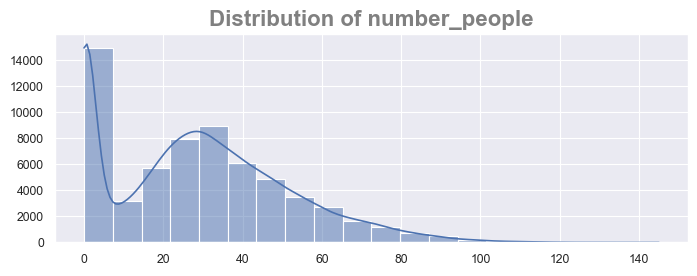

In [51]:
plot_df_distributions(df[['number_people']], figsize=(20, 3), bins=20, kde=True)

The distribution above is largely a normal distribution with a right skew (log normal), but with a spike at `0` indicating closed hours or simply hours in the middle of the night.

The is no point in transforming the target column via log normal or box-cox normal distributions as there is a significant number of `0` entries which can not be removed and scaling in this case will not help either. This can be seen by inspection below.

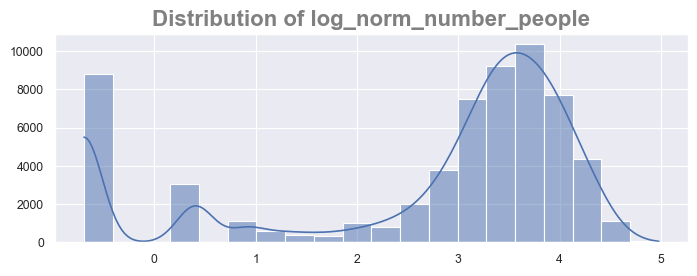

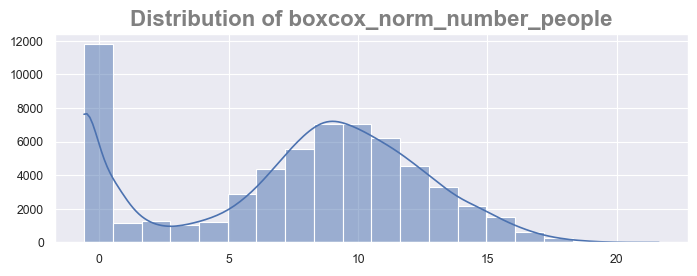

TEST RESULTS FOR log_norm_number_people:
------------------------------
Shapiro-Wilk p-value: 0.0
Shapiro-Wilk Test: The data does not follow a normal distribution.
Normaltest p-value: 7.994314721093099e-126
Normaltest: The data does not follow a normal distribution.
TEST RESULTS FOR boxcox_norm_number_people:
------------------------------
Shapiro-Wilk p-value: 9.830248857085024e-40
Shapiro-Wilk Test: The data does not follow a normal distribution.
Normaltest p-value: 2.403648318794622e-91
Normaltest: The data does not follow a normal distribution.


In [52]:
transformed_df = transform_col_distribution(df, 
                                            interest_col='number_people',
                                            scaling=0.5,
                                            alpha=0.01,
                                            sample_size=4000,
                                            random_seed=42,
                                            )

Next checking the distribution of data observations on a numebr of numerical columns of interest:

In [53]:
# numerical columns to list
num_cols = df.select_dtypes(include=np.number).columns.tolist()
num_cols

['number_people',
 'timestamp',
 'day_of_week',
 'is_weekend',
 'is_holiday',
 'temperature',
 'is_start_of_semester',
 'is_during_semester',
 'month',
 'hour']

Now creating `cols_of_interest` list. Removing target `number_people` and `timestamp` as this is redundant using `hour` instead.

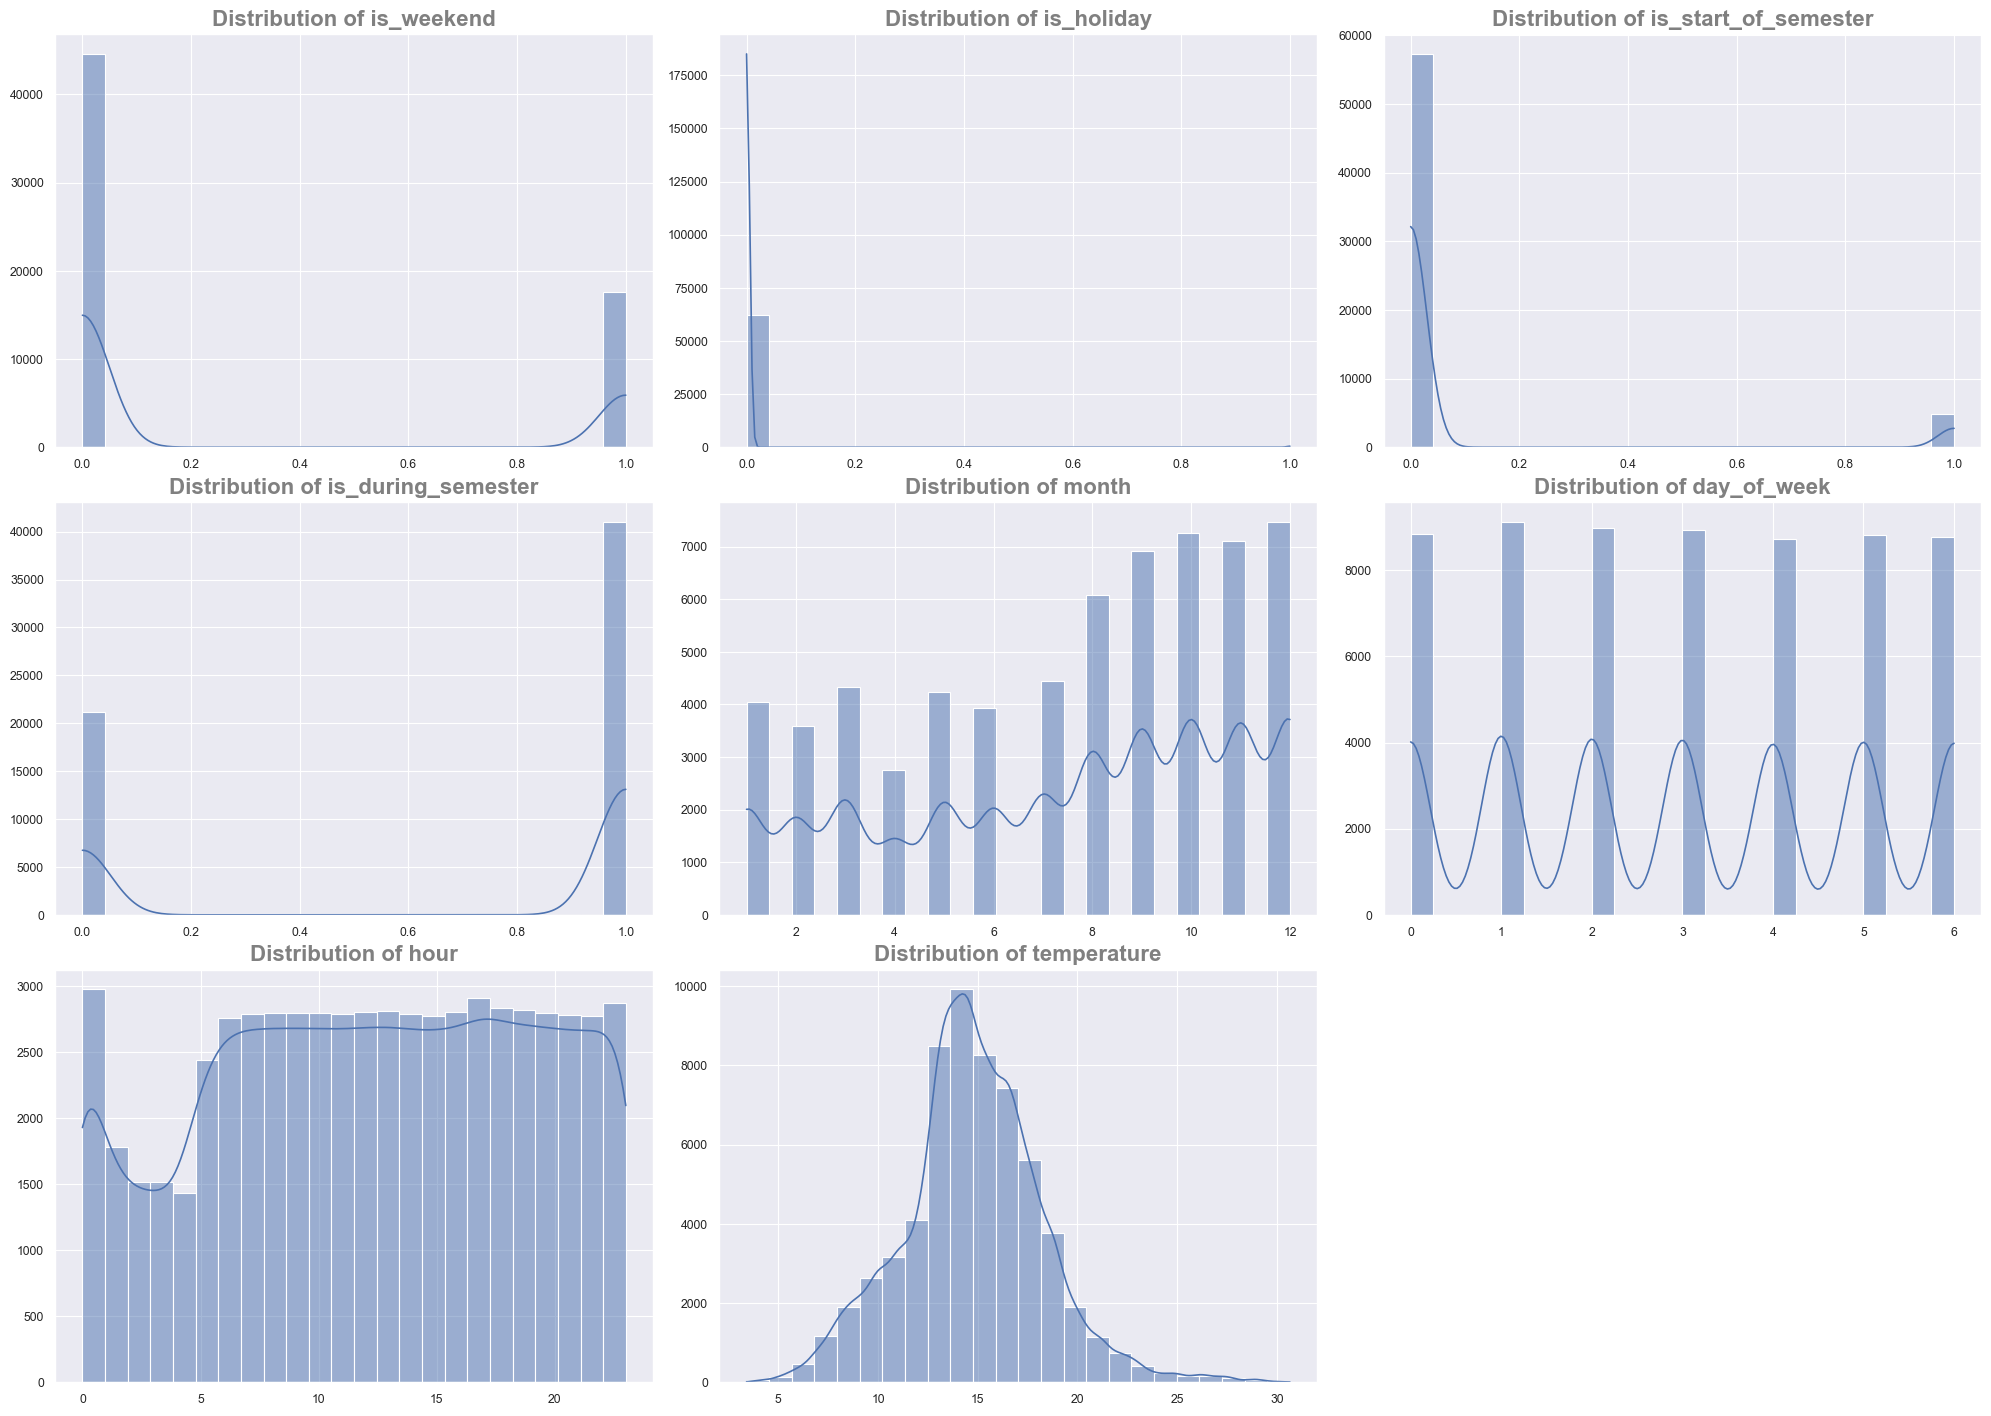

In [54]:
cols_of_interest = [
 'is_weekend',
 'is_holiday',
 'is_start_of_semester',
 'is_during_semester',
 'month',
 'day_of_week',
 'hour',
 'temperature',
 ]
plot_df_distributions(df[cols_of_interest], figsize=(20, 15), bins=24, kde=True)

**Observations on distribution plots above**

- `is_weekend`: This is not that informative, see `day_of_week` column

- `is_holiday`: This also is not that informative as the proportion of holidays to non-holidays is very small. To make this column use would need to know the proportion of holidays to non-holidays. 

- `is_start_of_semester`: Also not informative as the duration, in terms of days, for the start of the semester is not known.

- `is_during_semester`: Again, the proportion of semester verse non-semester days is not known, so this column is not so useful either. However, this might be of interest as planning training around the semester break might be useful.

- `month`: There is a clear difference in data entries/observations with respect to the month in the year. This column will likely be used in the model

- `day_of_week`: Somewhat surprising is the day of the week appears to have little effect on numbers at the gym. 

- `hour`: Not surprising there is a low point in this data, likely at the middle of the night. This column may be useful

- `temperature`: This column is of relative normal distribution, which is likely a result of the temperature distribution not the gym user behavour. In saying that this column may be of use.

Next considering the correlations of the features to the target:

## 2.3 Checking Correlations

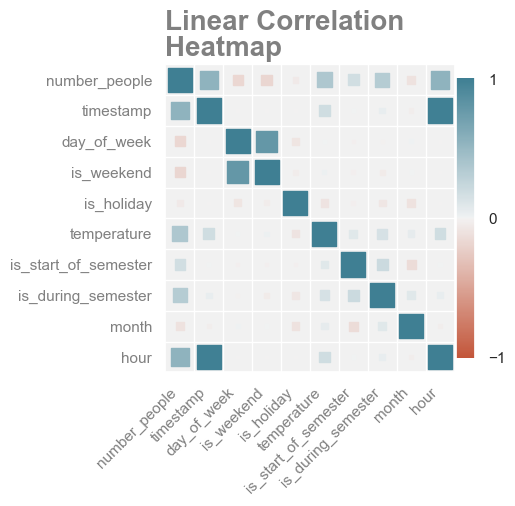

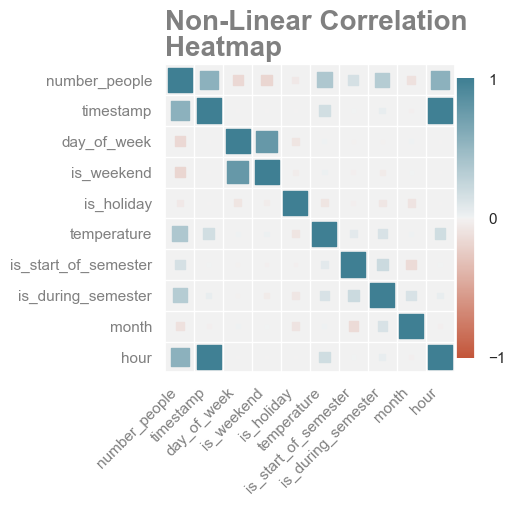

In [55]:
# Using the custom corrplot function to create a linear and non-linear correlation heatmap

# Linear Correlation Heatmap
plt.figure(figsize=(4, 4))
corrplot(df.corr(numeric_only=True), size_scale=300, title='Linear Correlation Heatmap')
plt.show()

# Non-Linear Correlation Heatmap
plt.figure(figsize=(4, 4))
corrplot(df.corr(method='spearman', numeric_only=True), 
         size_scale=300, title='Non-Linear Correlation Heatmap'
         )

In [56]:
disp_table_side_by_side(
    abs_corr_to_target(df, 'number_people', exclude_target=False),
    abs_corr_to_target(df, 'number_people', nonlinear_corr=True, exclude_target=False)
)

,Features,lin corr to: `number_people`
0,number_people,1.00
9,hour,0.55
1,timestamp,0.55
5,temperature,0.37
7,is_during_semester,0.34
6,is_start_of_semester,0.18
3,is_weekend,0.17
2,day_of_week,0.16
8,month,0.10
4,is_holiday,0.05


Before concluding the observations and selecting the features. A quick box plot distribution comparsion on the target will be carried out next:

### 2.4 Box Plot Distribution Comparsions

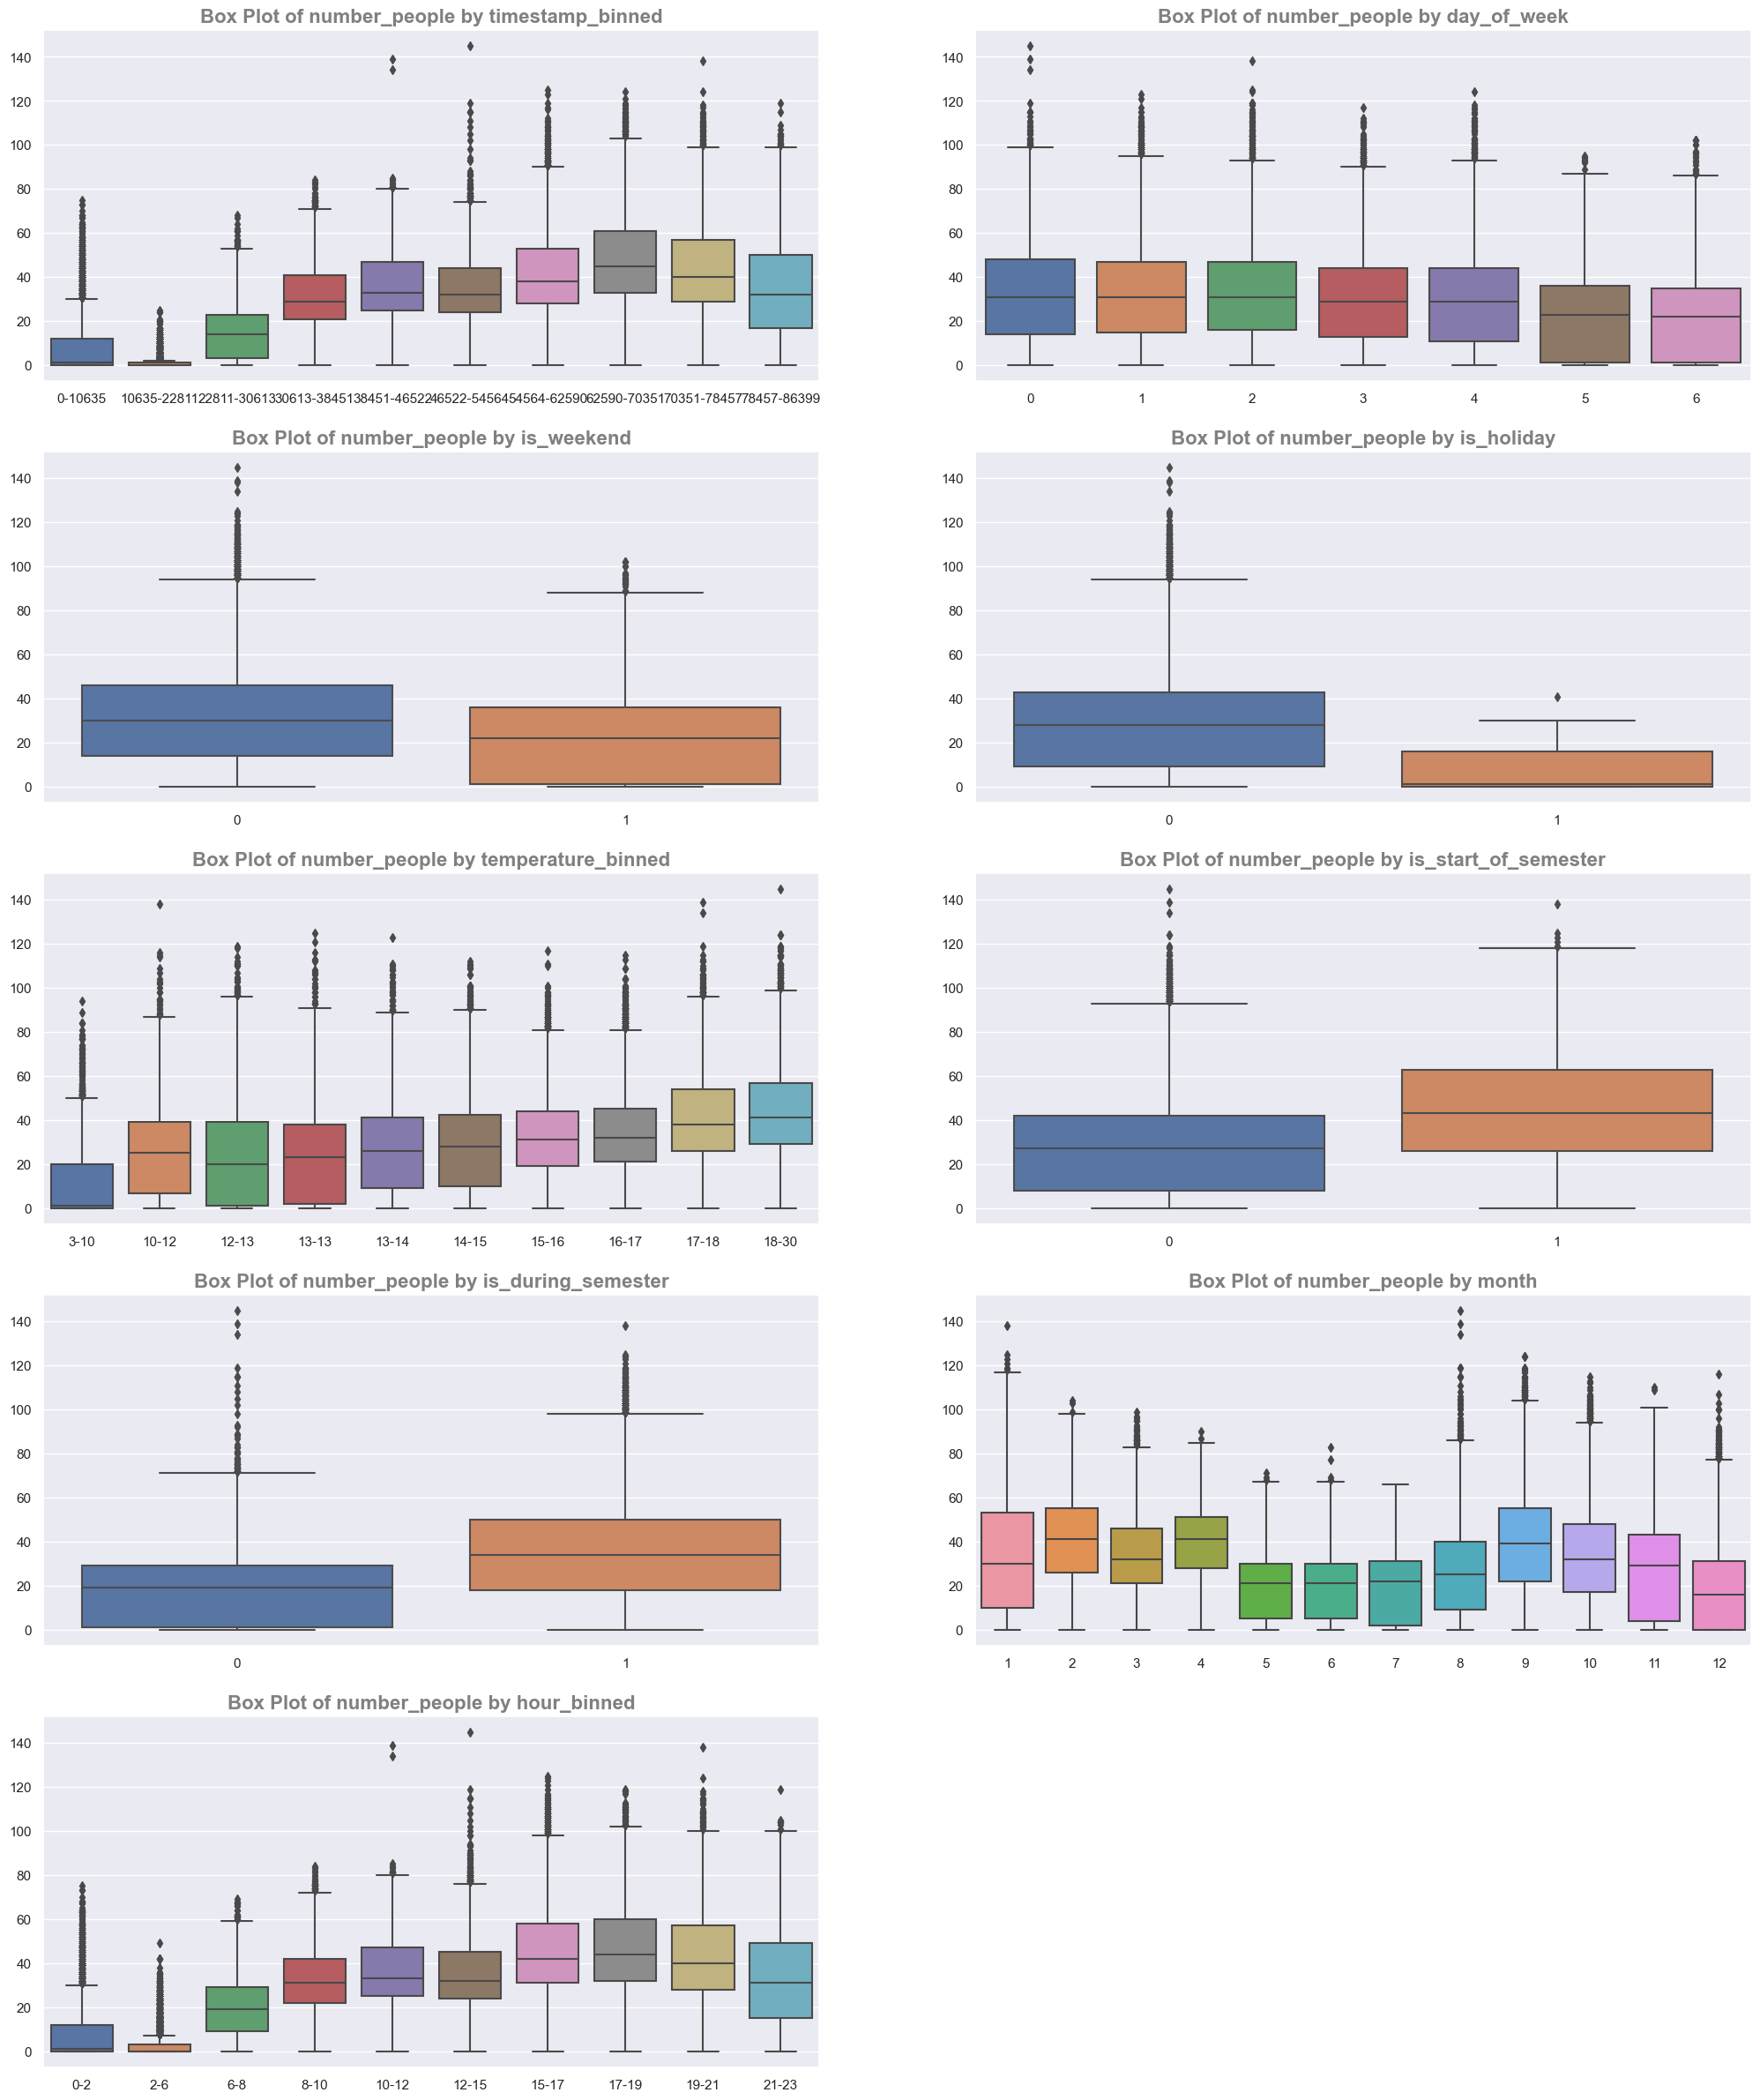

In [57]:
plot_box_plots(df, 
               y_col='number_people', 
               figsize=(25, 30), 
               num_columns=2, 
               exclude_cols=['number_people'], 
               bin_count=10,
               )

**Observations on correlations above**

Useful predictor/feature columns:

```
predictor_col = ['day_of_week',
                'is_weekend',
                'is_holiday',
                'temperature',
                'is_start_of_semester',
                'is_during_semester',
                'month',
                'hour']
```

Note these feature may change in newer versions.

Now creating a df with the selected variables:

In [58]:
# columns to list
num_cols = df.columns.tolist()
num_cols

['number_people',
 'date',
 'timestamp',
 'day_of_week',
 'is_weekend',
 'is_holiday',
 'temperature',
 'is_start_of_semester',
 'is_during_semester',
 'month',
 'hour']

In [59]:
selected_cols = ['number_people',
 'day_of_week',
 'is_weekend',
 'is_holiday',
 'temperature',
 'is_start_of_semester',
 'is_during_semester',
 'month',
 'hour']

df_select = df[selected_cols].copy()
df_select.head()



,number_people,day_of_week,is_weekend,is_holiday,temperature,is_start_of_semester,is_during_semester,month,hour
0,37,4,0,0,22.09,0,0,8,17
1,45,4,0,0,22.09,0,0,8,17
2,40,4,0,0,22.09,0,0,8,17
3,44,4,0,0,22.09,0,0,8,17
4,45,4,0,0,22.09,0,0,8,17


## 3. Model Construction
---

In [60]:
# Setting Predictors/features (X) and target (y)
X = df_select.drop(columns=['number_people'])
y = df_select['number_people']

# Setting traing and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# print size of training and test data
print(f"Training data size: {X_train.shape}")
print(f"Training target size: {y_train.shape}")
print(f"Test data size: {X_test.shape}")
print(f"Test target size: {y_test.shape}")

Training data size: (49747, 8)
Training target size: (49747,)
Test data size: (12437, 8)
Test target size: (12437,)


In [61]:
# Import the necessary library for the SGDRegressor
from sklearn.linear_model import SGDRegressor

# Create an instance of the SGDRegressor model with specified hyperparameters

# Set the regularization term alpha to 0.0001. Alpha controls the amount of regularisation applied to the model.
# Smaller values of alpha result in stronger regularization, which can help prevent overfitting.
# In this case, alpha is relatively small, indicating a mild amount of regularisation.
sgd_reg_v1 = SGDRegressor(alpha=0.0001,

# Set the learning rate to 'optimal'. The learning rate determines the step size at each iteration of the gradient descent.
# 'Optimal' mode adapts the learning rate during training to find a balance between fast convergence and stability.
# It's a good choice when you're unsure about the initial learning rate.
                       learning_rate='optimal', 

# Set the random_state to 42. The random_state is used for initialising the random number generator.
# Setting a fixed random_state ensures that the random aspects of the algorithm are reproducible.
# You can choose any integer value for random_state, and as long as it's the same, the results will be consistent.
                       random_state=42, 

# Set the maximum number of iterations to 10,000. This limits the number of iterations the algorithm will perform.
# It's important to have a maximum number of iterations to prevent the algorithm from running indefinitely.
                       max_iter=10000, 

# Set the tolerance to 1e-3. The tolerance determines when the optimization process should stop.
# When the change in the loss function (objective function) between iterations is smaller than the tolerance,
# the optimization is considered converged, and training stops.
                       tol=1e-3,

# Set the penalty to 'elasticnet'. Elastic Net is a regularisation technique that combines L1 (Lasso) and L2 (Ridge) regularisation.
# It's useful when you want to address multicollinearity and select important features while allowing some coefficients to be exactly zero.
                       penalty='elasticnet'
                       )


In [62]:
# Fit the model to the training data
sgd_reg_v1.fit(X_train, y_train)

SGDRegressor(learning_rate='optimal', max_iter=10000, penalty='elasticnet',
             random_state=42)

## 4. Model Performance Evaluation
---

This section first generates predictions and then evaluates them using various metrics:

- `mean_squared_error`: This metric measures the average squared difference between the predicted values and the actual target values. A lower value indicates better model performance in terms of reducing prediction errors.

- `mean_absolute_error`: This metric calculates the average absolute difference between the predicted values and the actual target values. It provides a measure of the average magnitude of errors made by the model.

- `r2_score`: Also known as the coefficient of determination, this metric quantifies how well the model explains the variance in the target variable. It ranges from 0 to 1, where 1 indicates a perfect fit, and lower values indicate worse fit.

- `cross_val_score`: This function is used to perform cross-validation and evaluate the model's performance. It assesses how well the model generalizes to unseen data by splitting the dataset into multiple subsets (folds) and training and testing the model on different combinations of these folds. The `cross_val_score` function returns a list of scores, typically using a specified evaluation metric (e.g., R-squared), for each fold.

### 4.1 Initial Evaluation

In [63]:

# Make predictions on the test data
y_pred_v1 = sgd_reg_v1.predict(X_test)

# Calculate the mean squared error (MSE) of the predictions
mse_v1 = mean_squared_error(y_test, y_pred_v1)
print(f'The mean squared error (MSE) of the predictions is: {mse_v1:.4f} \n')

# Calculate the mean absolute error (MAE) of the predictions
mae_v1 = mean_absolute_error(y_test, y_pred_v1)
print(f'The mean absolute error (MAE) of the predictions is: {mae_v1:.4f} \n')

# Calculate the R2 score of the predictions
r2_v1 = r2_score(y_test, y_pred_v1)
print(f'The R2 score of the predictions is: {r2_v1:.4f} \n')


# Perform 10-fold cross-validation score by default is R2 score but declare here for readability
scores_v1 = cross_val_score(sgd_reg_v1, X_train, y_train, cv=10, scoring='r2')

# Print the cross-validation scores
print(f'The cross-validation accuracy scores are: {scores_v1} \n')

# Print the mean cross-validation score
print(f'The mean cross-validation accuracy score is: {scores_v1.mean():.4f} \n')

# Print the standard deviation of the cross-validation scores
print(f'The standard deviation of the cross-validation accuracy scores is: {scores_v1.std():.4f} \n')
   

The mean squared error (MSE) of the predictions is: 254.6411 

The mean absolute error (MAE) of the predictions is: 12.3462 

The R2 score of the predictions is: 0.5073 

The cross-validation accuracy scores are: [0.49206576 0.50054631 0.4564628  0.48245637 0.49274995 0.29650054
 0.45858492 0.24311261 0.04331941 0.45814885] 

The mean cross-validation accuracy score is: 0.3924 

The standard deviation of the cross-validation accuracy scores is: 0.1435 



Interpreting the main square error and mean absolute error is somewhat difficult without scaled data, but the R2 score provides an indication of the models performance. The closer it is to 1.0 the better, given the model achieved only `0.5073` the model predictions are not great. To improve the models predictions next the data will be scalled and hyperparameters optimised using grid search.

Also, the cross-validation score returned a mean r2 score of only `0.3924` indicating the model is overfitting to the training data.

### 4.2 Improving model with scalling and grid search

In [64]:
# scalling data
from sklearn.preprocessing import StandardScaler

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler to the training data
scaler.fit(X_train)

# Transform the training data
X_train_scaled = scaler.transform(X_train)

# Transform the test data
X_test_scaled = scaler.transform(X_test)

In [65]:
# Create a dictionary of hyperparameters to search
grid_v1 = {'loss': ['squared_loss', 'huber', 'epsilon_insensitive'],
          'alpha': [0.0001, 0.001, 0.01, 0.1],
          'learning_rate': ['constant', 'optimal', 'invscaling'],
          'penalty': ['l1', 'l2', 'elasticnet'],
          'tol': [1e-3, 1e-4],
          'max_iter': [1000, 10000]
                        }

# Set up the grid search with 5-fold cross-validation
grid_cv_v1 = GridSearchCV(sgd_reg_v1, grid_v1, cv=5)

# Fit the grid search to the training data
grid_cv_v1.fit(X_train, y_train)

/Users/davidvanderbyl/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
720 fits failed out of a total of 2160.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
720 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/davidvanderbyl/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/davidvanderbyl/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py", line 1144, in wrapper
    estimator._validate_params()
  File "/Users/davidvanderbyl/anaconda3/envs/myenv/lib/python3.11/site-packages/sklearn/base.py

GridSearchCV(cv=5,
             estimator=SGDRegressor(learning_rate='optimal', max_iter=10000,
                                    penalty='elasticnet', random_state=42),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.1],
                         'learning_rate': ['constant', 'optimal', 'invscaling'],
                         'loss': ['squared_loss', 'huber',
                                  'epsilon_insensitive'],
                         'max_iter': [1000, 10000],
                         'penalty': ['l1', 'l2', 'elasticnet'],
                         'tol': [0.001, 0.0001]})

In [66]:
# Get the best hyperparameters
best_params_v1 = grid_cv_v1.best_params_
print(f'The best hyperparameters are:\n {best_params_v1} \n')

# Get the best model
best_model_v1 = grid_cv_v1.best_estimator_
print(f'The best model is:\n {best_model_v1} \n')

# Make predictions on the test data
y_pred_v2 = best_model_v1.predict(X_test)

# Calculate the mean squared error (MSE) of the predictions
mse_v2 = mean_squared_error(y_test, y_pred_v2)
print(f'The mean squared error (MSE) of the predictions is: {mse_v2:.4f} \n')

# Calculate the mean absolute error (MAE) of the predictions
mae_v2 = mean_absolute_error(y_test, y_pred_v2)
print(f'The mean absolute error (MAE) of the predictions is: {mae_v2:.4f} \n')

# Calculate the R2 score of the predictions
r2_v2 = r2_score(y_test, y_pred_v2)
print(f'The R2 score of the predictions is: {r2_v2:.4f} \n')

# Perform 10-fold cross-validation
scores_v2 = cross_val_score(best_model_v1, X_train, y_train, cv=10)

# Print the cross-validation scores
print(f'The cross-validation accuracy scores are: {scores_v2} \n')

# Print the mean cross-validation score
print(f'The mean cross-validation accuracy score is: {scores_v2.mean():.4f} \n')

# Print the standard deviation of the cross-validation scores
print(f'The standard deviation of the cross-validation accuracy scores is: {scores_v2.std():.4f} \n')    

The best hyperparameters are:
 {'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'epsilon_insensitive', 'max_iter': 1000, 'penalty': 'l1', 'tol': 0.0001} 

The best model is:
 SGDRegressor(alpha=0.001, learning_rate='optimal', loss='epsilon_insensitive',
             penalty='l1', random_state=42, tol=0.0001) 

The mean squared error (MSE) of the predictions is: 253.4545 

The mean absolute error (MAE) of the predictions is: 12.1140 

The R2 score of the predictions is: 0.5096 

The cross-validation accuracy scores are: [0.51035481 0.49712603 0.50488764 0.48069436 0.50488951 0.48236032
 0.49937159 0.4994681  0.50309916 0.50667266] 

The mean cross-validation accuracy score is: 0.4989 

The standard deviation of the cross-validation accuracy scores is: 0.0094 



Scalling and grid search did not improve the Accuracy of the model that much as they are not value only increase by about `0.01`. However the cross validation occurs the score increased by about `0.1` or `25%` which shows these measures to improve the model largely improved it's generalisation - the models bias towards the training data has reduced.

## 5. Visulising Results
---

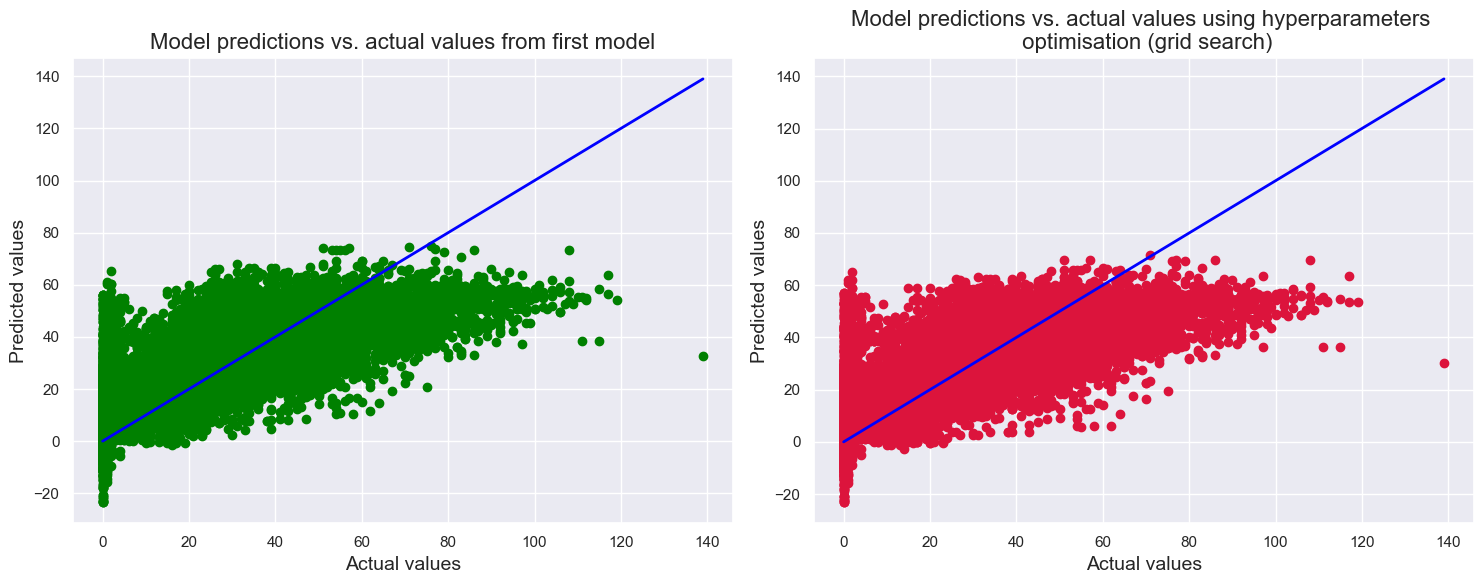

In [73]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 6))


# Plot the second scatter plot (y_pred_v1)
axes[0].scatter(y_test, y_pred_v1, c='green')  # Assuming y_pred_v1 is your other set of predictions
axes[0].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linewidth=2)
axes[0].set_title('Model predictions vs. actual values from first model', fontsize=16)
axes[0].set_xlabel('Actual values', fontsize=14)
axes[0].set_ylabel('Predicted values', fontsize=14)

# Plot the first scatter plot (y_pred_v2)
axes[1].scatter(y_test, y_pred_v2, c='crimson')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], c='blue', linewidth=2)
axes[1].set_title('Model predictions vs. actual values using hyperparameters \n optimisation (grid search)', fontsize=16)
axes[1].set_xlabel('Actual values', fontsize=14)
axes[1].set_ylabel('Predicted values', fontsize=14)

# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()

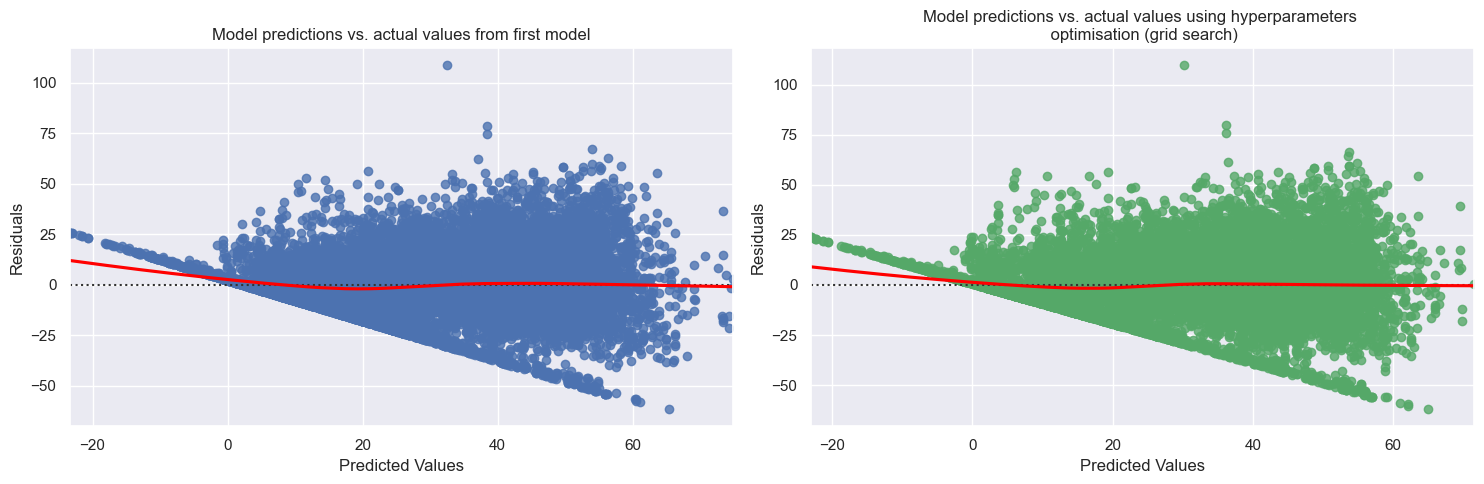

In [76]:
# Create a figure with one row and two columns
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# Plot the residuals for y_pred_v1
residuals_v1 = y_test - y_pred_v1
sns.residplot(x=y_pred_v1, y=residuals_v1, lowess=True, color='b', robust=True, line_kws={'color':'red'}, ax=axes[0])
axes[0].set_xlabel('Predicted Values')
axes[0].set_ylabel('Residuals')
axes[0].set_title('Model predictions vs. actual values from first model')

# Plot the residuals for y_pred_v2
residuals_v2 = y_test - y_pred_v2
sns.residplot(x=y_pred_v2, y=residuals_v2, lowess=True, color='g', robust=True, line_kws={'color':'red'}, ax=axes[1])
axes[1].set_xlabel('Predicted Values')
axes[1].set_ylabel('Residuals')
axes[1].set_title('Model predictions vs. actual values using hyperparameters \n optimisation (grid search)')



# Adjust spacing between subplots
plt.tight_layout()

# Show the subplots
plt.show()


## 6. Summarising Results
---

Overall the Linear Regression models using Stochastic Gradient Descent preformed poorly. There was only a slight improvement from the initial model to the model that used scalled data and under went hyperparameter optimisation using grid search.

In general the model over predictors the number of gym goers when the actual number is relatively low, it then under predicts the number of people in the gym when the actual number is quite high. This essentially means the model is not that useful in determine when the best time access the gym is, if the goal is to attend when the gym is least busy.

However, the linear regression model provides a good starting point and somewhat confirms that a difference modelling algorithm is required. This is likely due to the non-linearities in the predictors and the low correlation scores with respect to the target. Potentially using a model that preforms better with seasonal data would be the next step as the monthly data has strong seaonalility associated with it.